<a href="https://colab.research.google.com/github/Eliane-orlandin/Trilha_para_elas_IA/blob/main/Atividades_Trilha_ParaElas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Atividades sobre Análise Exploratória de Dados - Trilha de IA para Elas*

In [179]:
!pip install -U datasets

# Importações

In [180]:
#Importa biblioteca para carregar datasets do Hugging face
from datasets import load_dataset
#Importa biblioteca para geração de gráficos
import matplotlib.pyplot as plt
#Importa pandas
import pandas as pd
# Importa a biblioteca NLTK (Natural Language Toolkit) para processamento de linguagem natural
import nltk
# Importa a lista de palavras irrelevantes (stopwords) da NLTK
from nltk.corpus import stopwords
# Importa a biblioteca WordCloud, usada para gerar nuvens de palavras
from wordcloud import WordCloud

# Carregamento do Dataset de avaliações

In [181]:
#Carrega dataset do Hugging face
ds = load_dataset("ruanchaves/b2w-reviews01")

In [182]:
# Converter para DataFrame
df = pd.DataFrame(ds['train'])

# Exercícios

### 1. Gere um gráfico que mostre a distribuição do número de avaliações por gênero? Dica: Gere um gráfico de barras que represente o número de avaliações por gênero.

In [183]:
df.columns

Index(['submission_date', 'reviewer_id', 'product_id', 'product_name',
       'product_brand', 'site_category_lv1', 'site_category_lv2',
       'review_title', 'overall_rating', 'recommend_to_a_friend',
       'review_text', 'reviewer_birth_year', 'reviewer_gender',
       'reviewer_state'],
      dtype='object')

In [184]:
df.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,None,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,None,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


In [185]:
# Conta o número de avaliações por categoria de produto (gênero)
counts = df['reviewer_gender'].value_counts()

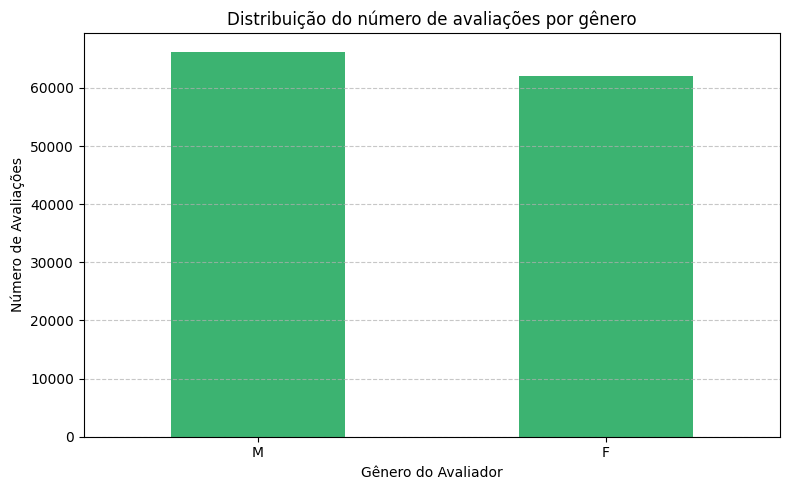

In [186]:
# Plota o gráfico de barras
plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color='mediumseagreen')
plt.title('Distribuição do número de avaliações por gênero')
plt.xlabel('Gênero do Avaliador')
plt.ylabel('Número de Avaliações')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2. Gere um gráfico que mostre a proporção do número de avaliações por gênero? Dica: Gere um gráfico de pizza que represente a proporção de avaliações para cada gênero.

In [187]:
# Conta o número de avaliações por gênero
counts = df['reviewer_gender'].value_counts()

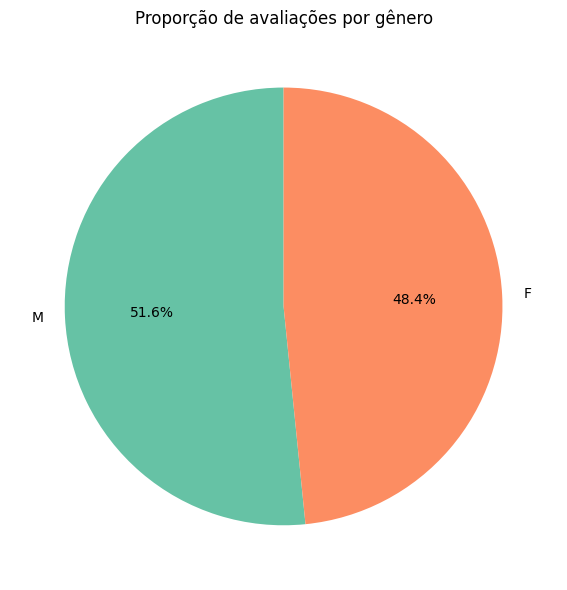

In [188]:
# Plota o gráfico de barras
plt.figure(figsize=(6, 6))
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Proporção de avaliações por gênero')
plt.ylabel('')
plt.tight_layout()
plt.show()

### 3. Gere um gráfico de barras das 10 categorias de produtos mais avaliadas. Dica: Considere o campo "site_category_lv1" como categoria do produto.

In [189]:
# Conta o número de avaliações por categoria de produto
top_categories = df['site_category_lv1'].value_counts().head(10)

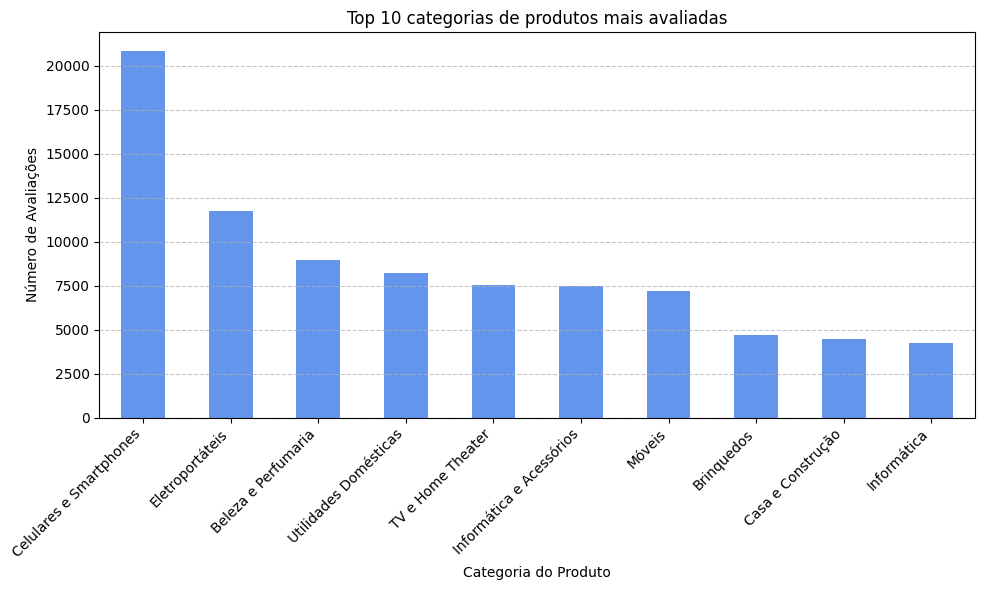

In [190]:
# Plota o gráfico de barras
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='cornflowerblue')
plt.title('Top 10 categorias de produtos mais avaliadas')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Avaliações')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4. Quais são os 5 produtos mais e menos avaliados? Dica: Utilize as funções head() e tail() para obter os top primeiros e os top ultimos produtos.

In [191]:
# Conta o número de avaliações por produto
product_counts = df['product_name'].value_counts()

In [192]:
# Top 5 produtos mais avaliados
top_5_mais_avaliados = product_counts.head(5)
print("Top 5 produtos MAIS avaliados:")
print(top_5_mais_avaliados)

Top 5 produtos MAIS avaliados:
product_name
Smartphone Motorola Moto G 5S Dual Chip Android 7.1.1 Nougat Tela 5.2" Snapdragon 430 32GB 4G Câmera 16MP - Platinum    792
Aspirador de Pó Philco Rapid 1000N Vermelho/Preto - 1000W                                                               756
Smartphone Samsung Galaxy J7 Metal Dual Chip Android 6.0 Tela 5.5" 16GB 4G Câmera 13MP - Dourado                        674
Smartphone Motorola Moto G 5S Dual Chip Android 7.1.1 Nougat Tela 5.2" Snapdragon 430 32GB 4G Câmera 16MP - Dourado     558
Smartphone Samsung Galaxy J7 Prime Dual Chip Android Tela 5.5" 32GB 4G Câmera 13MP - Dourado                            519
Name: count, dtype: int64


In [193]:
# Top 5 produtos menos avaliados
top_5_menos_avaliados = product_counts.tail(5)
print("Top 5 produtos MENOS avaliados:")
print(top_5_menos_avaliados)

Top 5 produtos MENOS avaliados:
product_name
Assento Sanitario Carrara Branco Para Louça Deca                   1
Bateria Para Notebook Dell Part Number M9014                       1
Rasteira Feminina Siena Moleca                                     1
Mochila De Costas Infantil Dmw G Tween Preta A Hora Da Aventura    1
Mixer Oster Duo Mix Função Turbo                                   1
Name: count, dtype: int64


### 5. Gere um gráfico de pizza que mostre a proporção de avaliação (1-5) das top 10 categorias de produtos mais vendidas?



In [194]:
# Pegar as 10 categorias mais avaliadas
top_10_categorias = df['site_category_lv1'].value_counts().head(10).index

In [195]:
# Filtrar o DataFrame apenas com essas categorias
df_top10 = df[df['site_category_lv1'].isin(top_10_categorias)]

In [196]:
# Contar a distribuição das notas (1 a 5)
rating_counts = df_top10['overall_rating'].value_counts().sort_index()

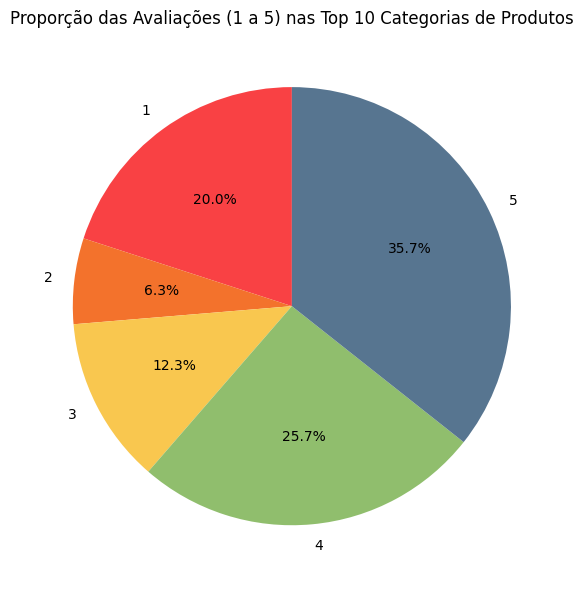

In [197]:
# Plotar o gráfico de pizza
plt.figure(figsize=(6, 6))
colors = ['#f94144', '#f3722c', '#f9c74f', '#90be6d', '#577590']
rating_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Proporção das Avaliações (1 a 5) nas Top 10 Categorias de Produtos')
plt.ylabel('')
plt.tight_layout()
plt.show()

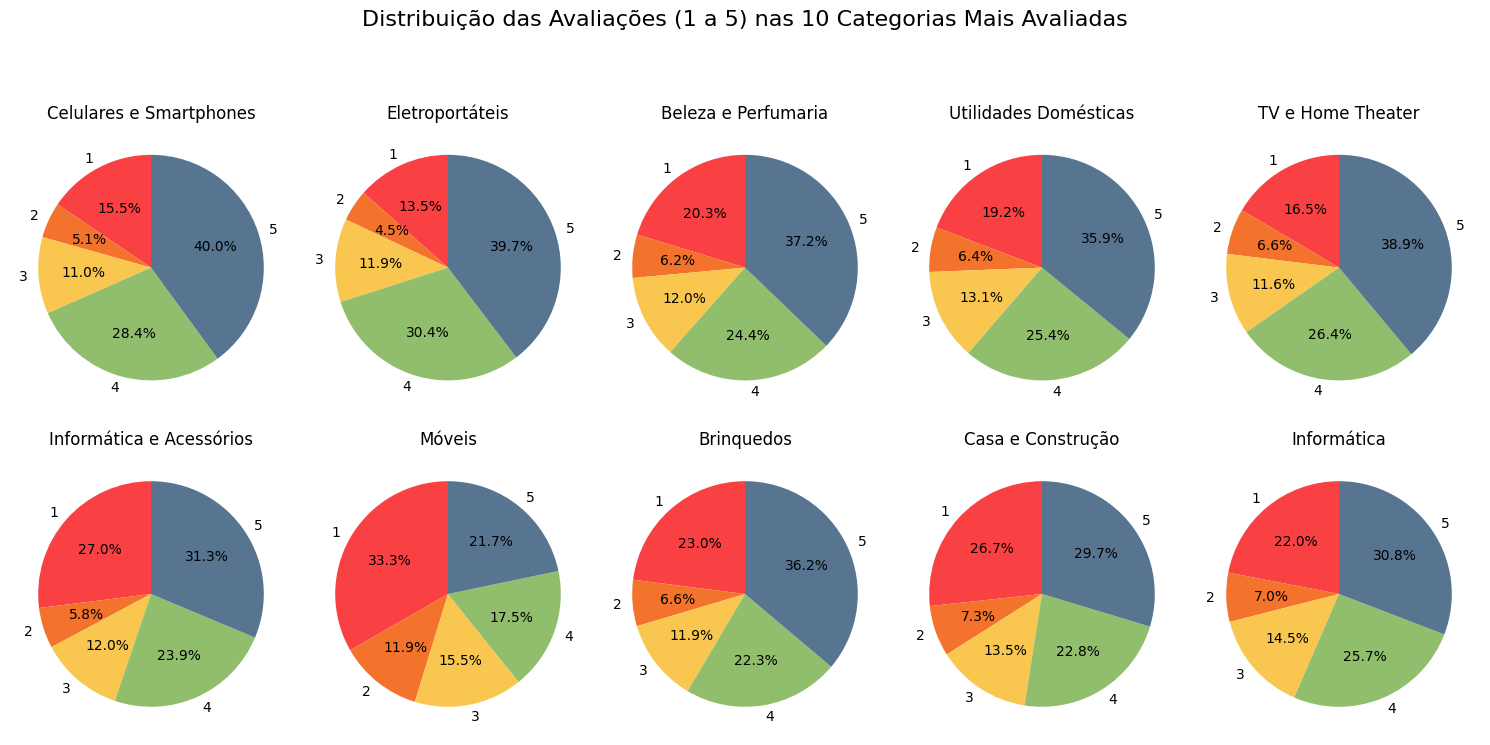

In [198]:
# Extra: Exibe as 10 categorias com mais avaliações
top_10_categorias = df['site_category_lv1'].value_counts().head(10).index

colors = ['#f94144', '#f3722c', '#f9c74f', '#90be6d', '#577590']

fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.flatten()

for i, categoria in enumerate(top_10_categorias):
    df_cat = df[df['site_category_lv1'] == categoria]

    rating_counts = df_cat['overall_rating'].value_counts().sort_index()

    for rating in range(1, 6):
        if rating not in rating_counts:
            rating_counts[rating] = 0
    rating_counts = rating_counts.sort_index()


    axes[i].pie(
        rating_counts,
        labels=[str(i) for i in rating_counts.index],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    axes[i].set_title(categoria)


plt.suptitle('Distribuição das Avaliações (1 a 5) nas 10 Categorias Mais Avaliadas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 6. Gere um gráfico de pizza que mostre a proporção de avaliação (1-5) dos avaliadores entre 31-40 anos?

In [199]:
#Converter as informações do submission_date que está string para datetime e gravar no campo "submission_data_1"
df['submission_date_1'] = pd.to_datetime(df['submission_date'],errors='coerce')

# Extrair o ano da submissão do novo campo e salvar no campo submission_year
df['submission_year'] = df['submission_date_1'].dt.year

In [200]:
#Cria campo idade e calcula a idade de cada revisor
df['idade'] = df['submission_year'] - df['reviewer_birth_year']

In [201]:
# Filtra apenas os avaliadores entre 31 e 40 anos
df_31_40 = df[(df['idade'] >= 31) & (df['idade'] <= 40)]

In [202]:
# Conta a quantidade de avaliações por nota (1 a 5)
rating_counts = df_31_40['overall_rating'].value_counts().sort_index()

In [203]:
# Garante que todas as notas (1 a 5) estejam presentes no gráfico
for rating in range(1, 6):
    if rating not in rating_counts:
        rating_counts[rating] = 0
rating_counts = rating_counts.sort_index()

In [204]:
# Define cores personalizadas para as notas
colors = ['#f94144', '#f3722c', '#f9c74f', '#90be6d', '#577590']

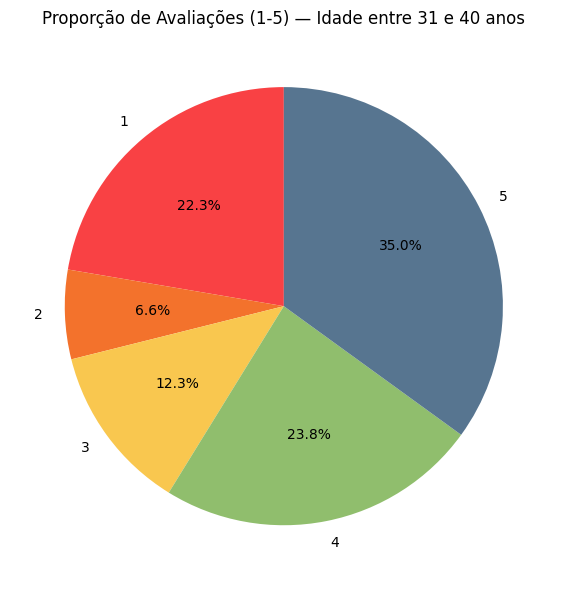

In [205]:
# Plota o gráfico de pizza
plt.figure(figsize=(6, 6))
rating_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    labels=[str(i) for i in rating_counts.index]
)
plt.title('Proporção de Avaliações (1-5) — Idade entre 31 e 40 anos')
plt.ylabel('')
plt.tight_layout()
plt.show()

### 7. Gere uma *wordcloud* das palavras mais frequentes encontradas nos textos das avaliações positivas (considere avaliações positivoas as notas 4 e 5)?

In [206]:
# Baixe
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [207]:
# Pegue a lista de stopwords em português
stopwords_pt = set(stopwords.words('portuguese'))

In [208]:
#Extrai somente o texto de avaliações
texts = df['review_text']

In [209]:
# Pegue a lista de stopwords em português
full_text = " ".join([str(text) if text is not None else "" for text in texts])

In [210]:
# Gera word cloud eliminando stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_pt).generate(full_text)

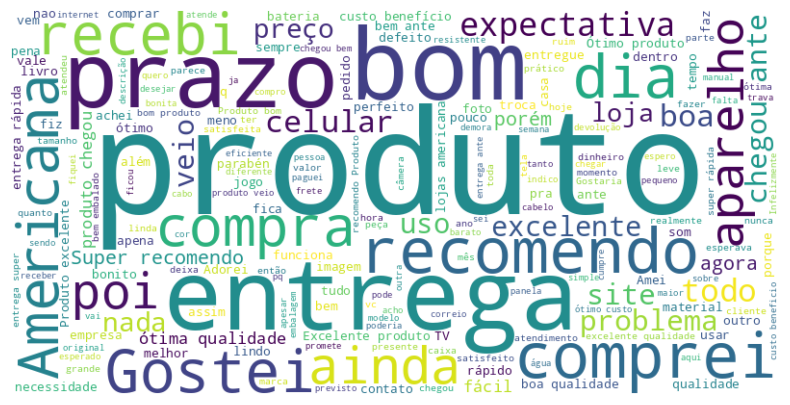

In [211]:
# Mostra a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 8. Gere uma nuvem de palavras para cada faixa etária de idade (['<20', '21–30', '31–40', '41–50', '51–60', '60+']) considerando o título das avaliações (campo 'review_title').

In [212]:
# Definir função para categorizar faixas etárias
def faixa_etaria(idade):
    if idade < 20:
        return '<20'
    elif 21 <= idade <= 30:
        return '21–30'
    elif 31 <= idade <= 40:
        return '31–40'
    elif 41 <= idade <= 50:
        return '41–50'
    elif 51 <= idade <= 60:
        return '51–60'
    else:
        return '60+'

In [213]:
# Criar a coluna 'faixa_etaria'
df['faixa_etaria'] = df['idade'].apply(faixa_etaria)

# Faixas etárias para gerar as nuvens
faixas = ['<20', '21–30', '31–40', '41–50', '51–60', '60+']

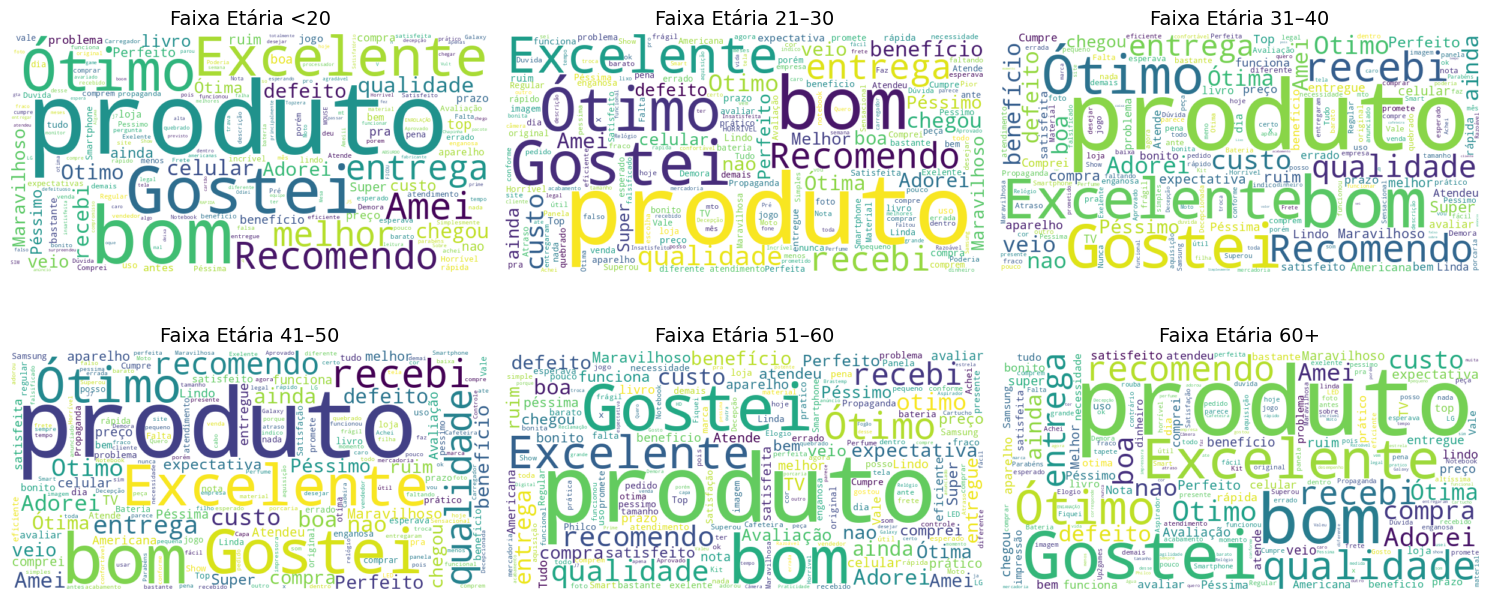

In [214]:
# Criar figura para múltiplas nuvens
fig, axes = plt.subplots(2, 3, figsize=(15, 7))
axes = axes.flatten()

for i, faixa in enumerate(faixas):
    # Filtrar os títulos das avaliações para a faixa etária atual
    textos = df[df['faixa_etaria'] == faixa]['review_title'].dropna().astype(str)

    # Juntar todos os títulos em uma string única
    full_text = " ".join(textos)

    # Gerar wordcloud para a faixa atual
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stopwords_pt,
        collocations=False
    ).generate(full_text)

    # Mostrar no subplot correspondente
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Faixa Etária {faixa}', fontsize=14)

plt.tight_layout()
plt.show()

### 9. ***Desafio***: Gere um gráfico de barras com a distribuição de avaliações por faixa etária da idade. Considerar o seguinte range de faixas: '<20', '21–30', '31–40', '41–50', '51–60', '60+'

In [215]:
# Função para categorizar a idade nas faixas desejadas
def faixa_etaria(idade):
    if idade < 20:
        return '<20'
    elif 21 <= idade <= 30:
        return '21–30'
    elif 31 <= idade <= 40:
        return '31–40'
    elif 41 <= idade <= 50:
        return '41–50'
    elif 51 <= idade <= 60:
        return '51–60'
    else:
        return '60+'

In [216]:
# Contar o número de avaliações por faixa
contagem_faixas = df['faixa_etaria'].value_counts().reindex(['<20', '21–30', '31–40', '41–50', '51–60', '60+'])

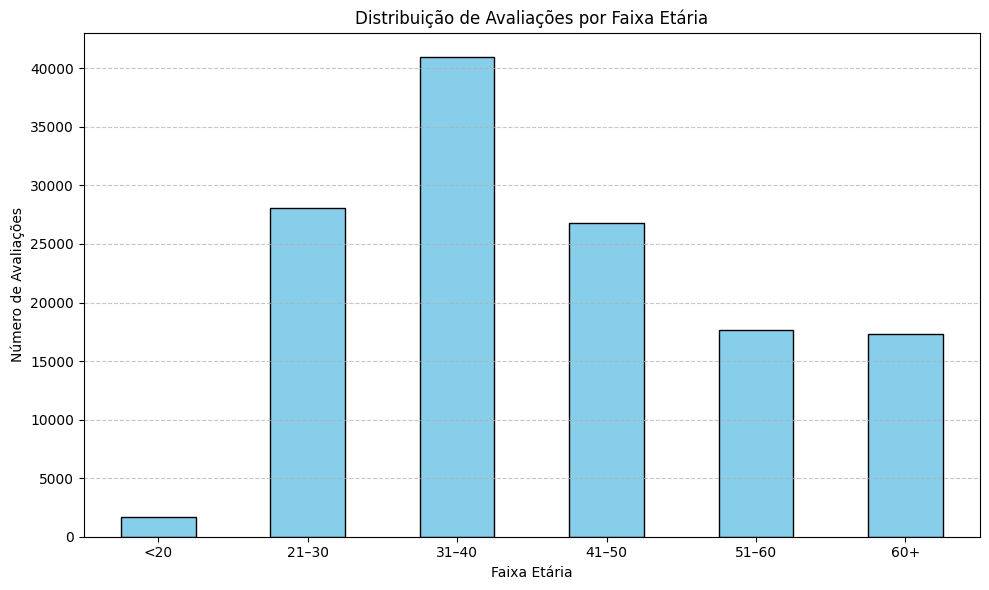

In [217]:
# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
contagem_faixas.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição de Avaliações por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Avaliações')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 10. ***Desafio***: Criar uma tabela cruzada para demonstrar a correlação entre Avaliações e Recomendação ('overall_rating') para uma amigo ('recommend_to_a_friend'). Dica: utilizar a função crosstab do pandas (https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html).

In [218]:
# Criar a tabela cruzada
tabela_cruzada = pd.crosstab(df['overall_rating'], df['recommend_to_a_friend'])

In [219]:
# Exibir a tabela
print(tabela_cruzada)

recommend_to_a_friend     No    Yes
overall_rating                     
1                      26574    795
2                       6321   2068
3                       1879  14434
4                        508  31837
5                        705  47234


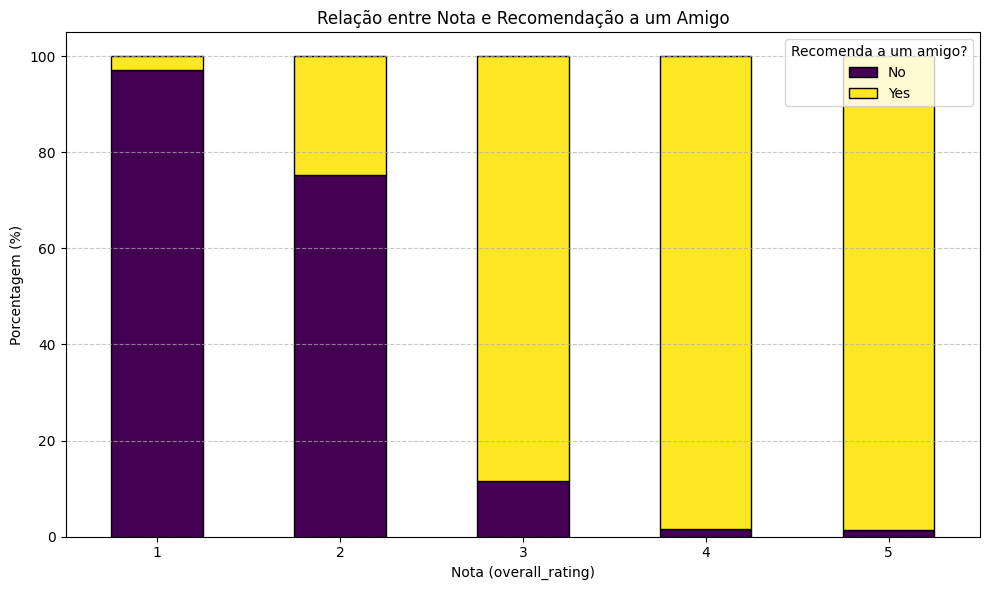

In [220]:
# Criar tabela cruzada com porcentagem por linha
tabela_pct = pd.crosstab(df['overall_rating'], df['recommend_to_a_friend'], normalize='index') * 100

# Ordenar pelo índice (nota)
tabela_pct = tabela_pct.sort_index()

# Criar gráfico de barras empilhadas
tabela_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='black')

plt.title('Relação entre Nota e Recomendação a um Amigo')
plt.xlabel('Nota (overall_rating)')
plt.ylabel('Porcentagem (%)')
plt.legend(title='Recomenda a um amigo?')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
